In [36]:
from pyforest import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

In [3]:
data = pd.read_csv('predicting_finalexamScore.csv')

In [5]:
data.head()

,gender,ClassParticipation,Parentalnvolvement,CourseCompletion,assignemnts score,sba score,mid-term score,Prediction
0,female,1,3,0,72,72,74,2
1,female,2,1,1,69,90,88,2
2,female,1,4,0,90,95,93,2
3,male,0,2,0,47,57,44,1
4,male,2,1,0,76,78,75,2


In [6]:
data.shape

(200, 8)

In [7]:
data.describe()

,ClassParticipation,Parentalnvolvement,CourseCompletion,assignemnts score,sba score,mid-term score,Prediction
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.13000,1.410000,0.365000,64.285000,67.685000,66.415000,1.855000
std,1.16183,1.264871,0.482638,15.893293,15.764784,16.232692,0.352984
min,0.00000,0.000000,0.000000,0.000000,17.000000,10.000000,1.000000
25%,1.00000,0.000000,0.000000,54.000000,55.750000,55.000000,2.000000
50%,2.00000,1.000000,0.000000,65.000000,68.000000,68.000000,2.000000
75%,3.00000,2.000000,1.000000,75.000000,79.000000,78.000000,2.000000
max,4.00000,4.000000,1.000000,100.000000,100.000000,100.000000,2.000000


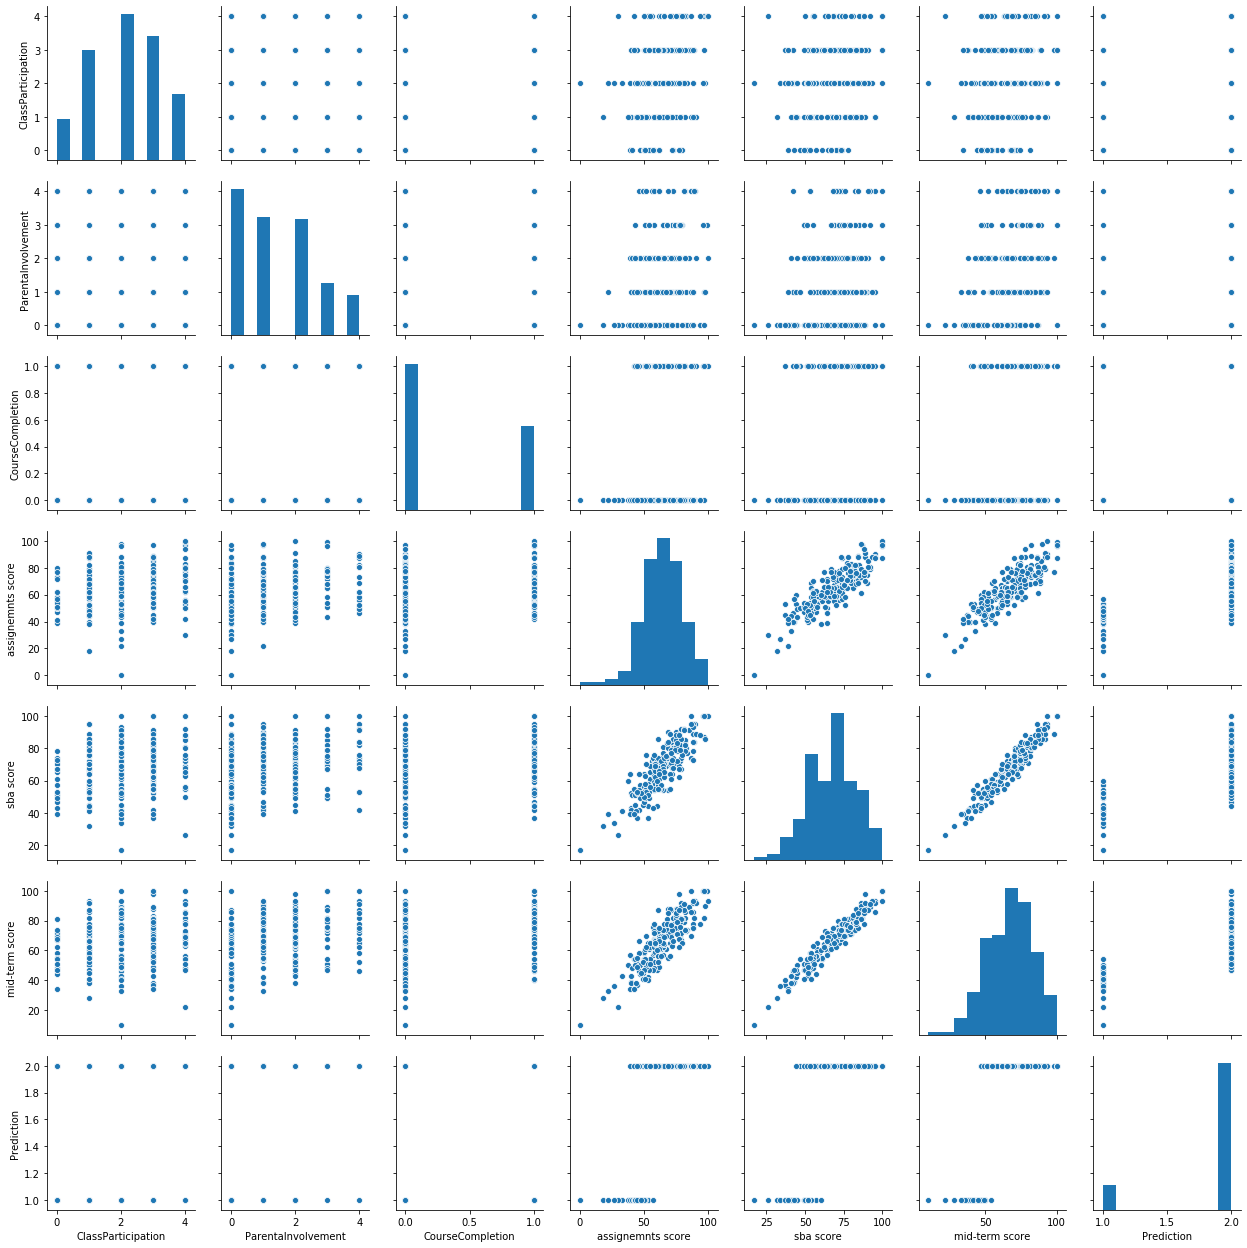

In [8]:
sns.pairplot(data)

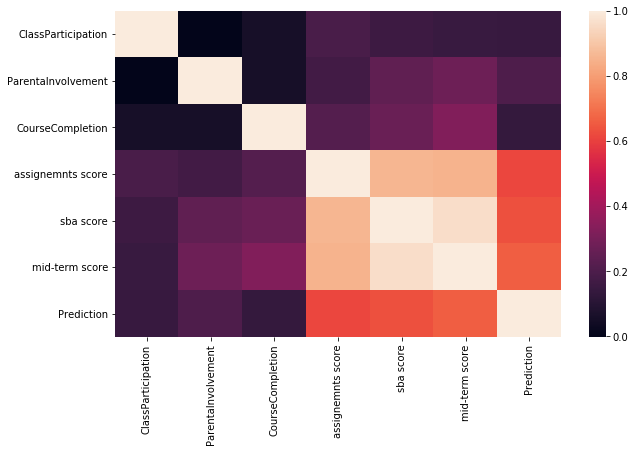

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [10]:
data.columns

Index(['gender', 'ClassParticipation', 'Parentalnvolvement',
       'CourseCompletion', 'assignemnts score', 'sba score', 'mid-term score',
       'Prediction'],
      dtype='object')

In [15]:
features = data[['ClassParticipation', 'Parentalnvolvement',
       'CourseCompletion', 'assignemnts score', 'sba score', 'mid-term score']]


In [16]:
label= data[['Prediction']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [19]:
print(features_train.shape)

(180, 6)


In [20]:
print(label_test.shape)

(20, 1)


In [21]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(features_train,label_train)

C:\Users\Eugene Teddy Owusu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eugene Teddy Owusu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
label_test.iloc[0]

Prediction    2
Name: 193, dtype: int64

In [27]:
model.predict(features_test)[0]

2

In [33]:
from sklearn.metrics  import classification_report, confusion_matrix

In [34]:
print(classification_report(label_test,model.predict(features_test)))

              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [35]:
print(confusion_matrix(label_test,model.predict(features_test)))

[[ 1  2]
 [ 0 17]]


In [32]:
#save predicstind_finalexamScoremodel

In [37]:
dump(model, 'predicting_finalexamScore.joblib')

['predicting_finalexamScore.joblib']